In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")

In [3]:
data1 = pd.read_feather("gamma345")
data2 = pd.read_feather("gamma7")
data3 = pd.read_feather("gamma10")
data4 = pd.read_feather("gamma14")
input_vars1 = pd.read_csv("input_parameters345.csv")
input_vars2 = pd.read_csv("input_parameters7.csv")
input_vars3 = pd.read_csv("input_parameters10.csv")
input_vars4 = pd.read_csv("input_parameters14.csv")
os = pd.read_csv("output_names.csv")

In [4]:
data2.o0 = data2.o0+48
data3.o0 = data3.o0+48+16
data4.o0 = data4.o0+48+16+11
data = pd.concat((data1,data2))
data = pd.concat((data,data3))
data = pd.concat((data,data4))

input_vars = pd.concat((input_vars1,input_vars2))
input_vars = pd.concat((input_vars,input_vars3))
input_vars = pd.concat((input_vars,input_vars4))
input_vars = input_vars.reset_index()


In [207]:
input_vars_filtered[input_vars_filtered.gamma==14]

,index,Unnamed: 0,capacity_policy,minfood_access_policy,maxfood_access_policy,day_access_policy,rerouting_policy,alpha,beta,gamma,epsilon,parallel_served_full,avg_interactions
75,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,6.0,20.0
76,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,6.4,20.0
77,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,6.8,20.0
78,3,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,7.2,20.0
79,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,7.6,20.0
80,5,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,8.0,20.0
81,6,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,8.4,20.0
82,7,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,8.8,20.0
83,8,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,9.2,20.0
84,9,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,9.6,20.0


In [222]:
len(data4)/4320

11.0

In [79]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

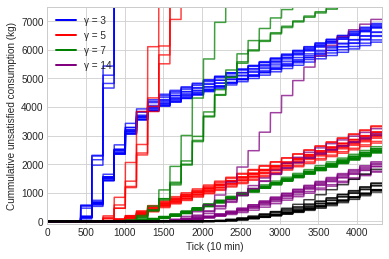

In [237]:
# dict to store relevant indices

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['blue', 'red', 'green','purple','black']

input_vars_filtered = input_vars#[input_vars.parallel_served_full==7.6]
# # plot batch per color
# for i in [6.0,6.4,6.8,7.2,7.6,8.0,8.4,8.8,9.2,9.6,10,10.4,10.8,11.2,11.4,11.8]:  

#     for j in input_vars_filtered[input_vars_filtered.parallel_served_full==i].index:
#         plt.plot( x, data.o1[data.o0==j])#,color=colors[i-6], alpha=.75)

gammas = [3,5,7,10,14]
for lala in range(len(gammas)):  
    i=gammas[lala]
    for j in input_vars_filtered[input_vars_filtered.gamma==i].index:
        plt.plot( x, data.o1[data.o0==j],color=colors[lala], alpha=.75)

            
# graph layout
# plt.title("")
plt.ylabel("Cummulative unsatisfied consumption (kg)")
plt.xlabel("Tick (10 min)")
plt.xlim([0,4320])

from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green','purple','black']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 5', 'γ = 7', 'γ = 14']
plt.legend(lines, labels)

plt.ylim([-100,7500]);
# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")


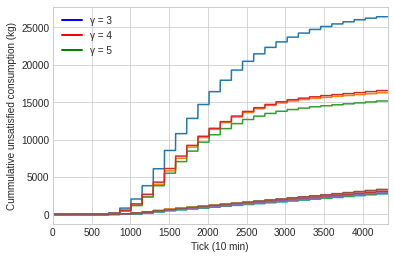

In [5]:
# dict to store relevant indices

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['blue', 'red', 'green','yellow','purple']

input_vars_filtered = input_vars[input_vars.gamma==5]
# plot batch per color
for i in [6.0,6.4,6.8,7.2,7.6,8.0,8.4,8.8,9.2,9.6,10,10.4,10.8,11.2,11.4,11.8]:    

    for j in input_vars_filtered[input_vars_filtered.parallel_served_full==i].index:
        plt.plot( x, data.o1[data.o0==j])#,color=colors[i-6], alpha=.75)
            
# graph layout
# plt.title("")
plt.ylabel("Cummulative unsatisfied consumption (kg)")
plt.xlabel("Tick (10 min)")
plt.xlim([0,4320])

from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green','yellow']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 4', 'γ = 5']
plt.legend(lines, labels)
# plt.ylim([-100,7500]);
# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

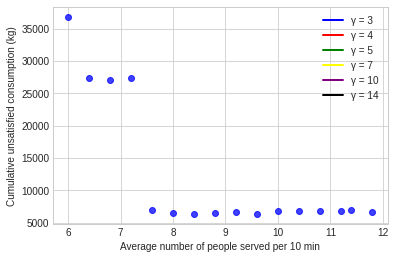

In [25]:
# dict to store relevant indices

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['blue', 'red', 'green','yellow','purple','black']


input_vars_filtered = input_vars[input_vars.gamma==3]
cd = {}
labels = list()
gammas = [3,4,5,7,10,14]
for g in range(len(gammas)):
    cd[gammas[g]]=colors[g]
    labels.append('γ = %s'%gammas[g])

# plot batch per color
for i in [6.0,6.4,6.8,7.2,7.6,8.0,8.4,8.8,9.2,9.6,10,10.4,10.8,11.2,11.4,11.8]:    

    for j in input_vars_filtered[input_vars_filtered.parallel_served_full==i].index:
        
        plt.plot( i, data.o1[data.o0==j].iloc[-1],marker='o',color=cd[input_vars_filtered[input_vars_filtered.parallel_served_full==i].gamma[j]], alpha=.75)
            
# graph layout
# plt.title("")
plt.ylabel("Cumulative unsatisfied consumption (kg)")
plt.xlabel("Average number of people served per 10 min")
# plt.xlim([0,4320])

from matplotlib.lines import Line2D

# colors = ['blue', 'red', 'green','yellow']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
# labels = ['γ = 3', 'γ = 4', 'γ = 5']
plt.legend(lines, labels)
# plt.ylim([-100,7500]);
# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

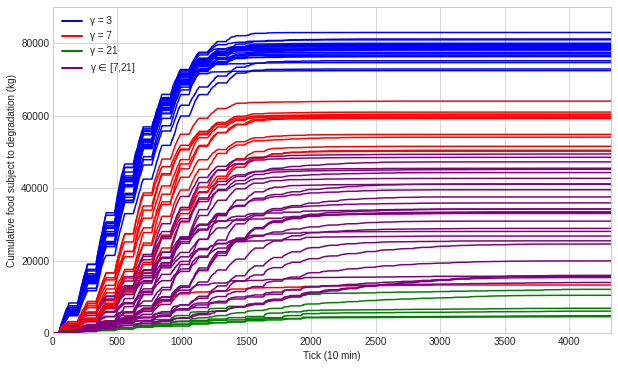

In [9]:
fig = plt.figure(figsize=(10,6))
x = np.linspace(0,4319,4320)
colorscheme = ['blue','red','green']
for i in d:    
    for j in d[i]:


        if j in d1[1]:
            plt.plot( x, data.o2[data.o0==j],color='purple' )
        else:
            plt.plot( x, data.o2[data.o0==j],color=colorscheme[i] )

# graph layout
# plt.title("Food degradation; base policies;\nsampling beh. factors");
plt.ylabel("Cumulative food subject to degradation (kg)");
plt.xlabel("Tick (10 min)");
plt.xlim([0,4320]);
plt.ylim([-100,90000]);


from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green','purple']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21','γ $∈$ [7,21]']
plt.legend(lines, labels)
plt.savefig("/home/daan/Desktop/food_degradation.png")
# plt.ylim([-100,7500]);

# plt.plot(x,np.ones(len(x))*maxval,lw=1.5,color='black')
# plt.plot(x,np.ones(len(x))*minval,lw=1.5,color='black')

Alle input waarden zijn aanwezig in de set van gamma=7 (paars) en gamma=21 (oranje)

In principe doet gamma=21 het beter met lagere extreme waarde dan gamma=7. Welke combinatie van waarden brengt 21 en 7 naar elkaar toe? 

alpha: 0 and 0.5 present in orange and puprle gamma zones

epsilon 0,0.5,1.0 min of meer gelijk verdeeld over oranje en paarse gamma zones

beta = 1,0.5 allemaal in oranje -> drukker netwerk 

one run beta=0 with gamma=21

Gamma = 7 paars, gamma=21 oranje. alpha vars altijd 0 of 0.5 

## Queuing

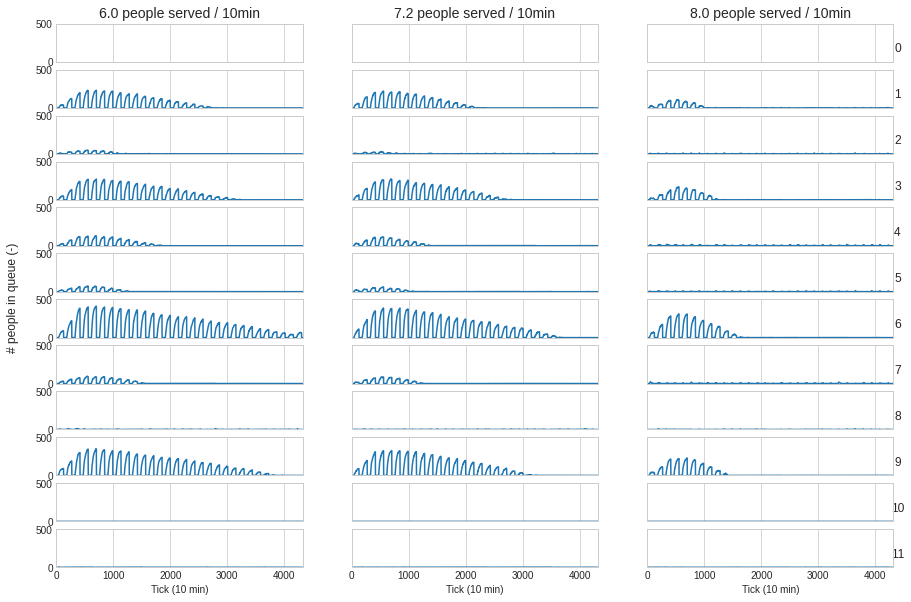

In [38]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data


nb_facs = 12
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,10))

input_vars_filtered = input_vars[input_vars.gamma==3]
d={}
d[0] = input_vars_filtered[input_vars_filtered.parallel_served_full == 6.0].index
d[1] = input_vars_filtered[input_vars_filtered.parallel_served_full == 6.4].index
d[2] = input_vars_filtered[input_vars_filtered.parallel_served_full == 8.4].index

labels = ['6.0 people served / 10min', '7.2 people served / 10min', '8.0 people served / 10min']

for c in range(nb_clusters):
    for i in d[c]:
        for f in range(nb_facs):
            ax[f,c].plot(x,data[data.o0==i].iloc[:,f+4])
            ax[f,c].set_xlim([0,4320])
            ax[f,c].set_ylim([0,500])
            ax[f,2].yaxis.set_label_position("right")
            ax[f,2].set_ylabel(f,rotation='horizontal',fontsize=12)
            ax[f,c].set_yticks([0,500])
            
            
    ax[0,c].set_title(labels[c],fontsize=14)
    ax[11,c].set_xlabel("Tick (10 min)")

fig.text(0.085, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/allqueues_clustered.png")

plt.show()

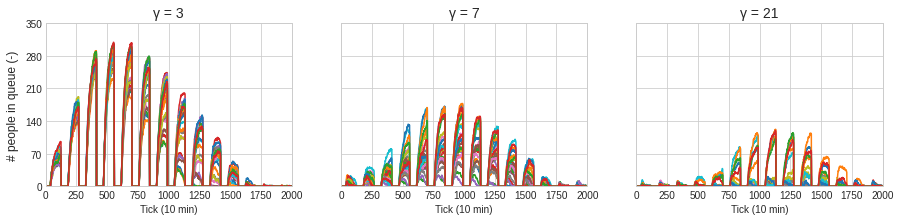

In [22]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

nb_facs = 1
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,3))#,gridspec_kw={'width_ratios': width_ratios})
f=5
for c in range(nb_clusters):
    for i in d[c]:
        ax[c].plot(x,data[data.o0==i].iloc[:,f+3])
        ax[c].set_xlim([0,2000])
        ax[c].set_ylim([0,350])
#         ax[0].set_ylabel("$\mathit{Fac %s}$"%f,rotation='horizontal',fontsize=12)
        ax[c].set_yticks([0,70,140,210,280,350])
        ax[c].set_title(labels[c],fontsize=14)
    ax[c].set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")

plt.show()

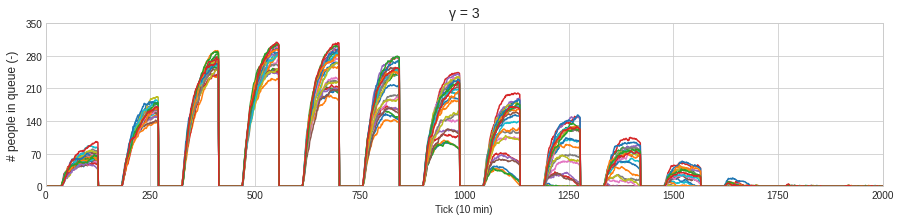

In [24]:
nb_facs = 1
nb_clusters = 1
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,3))#,gridspec_kw={'width_ratios': width_ratios})
f=5
for c in range(nb_clusters):
    for i in d[c]:
        ax.plot(x,data[data.o0==i].iloc[:,f+3])
        ax.set_xlim([0,2000])
        ax.set_ylim([0,350])
#         ax[0].set_ylabel("$\mathit{Fac %s}$"%f,rotation='horizontal',fontsize=12)
        ax.set_yticks([0,70,140,210,280,350])
        ax.set_title(labels[c],fontsize=14)
    ax.set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")

plt.show()

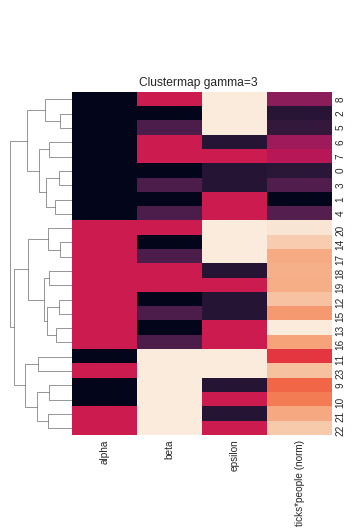

In [79]:
# Summed queuing load for gamma=3
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o8[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30
filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

import seaborn as sns
fig = sns.clustermap(filtered_input_vars.loc[:,'alpha':],cbar_pos=None,figsize = (5,7.5),col_cluster=False)
fig.fig.suptitle('Clustermap gamma=3',y=0.85,x=0.56) 
fig.savefig("/home/daan/Desktop/clustermap_queuegamma3.png")

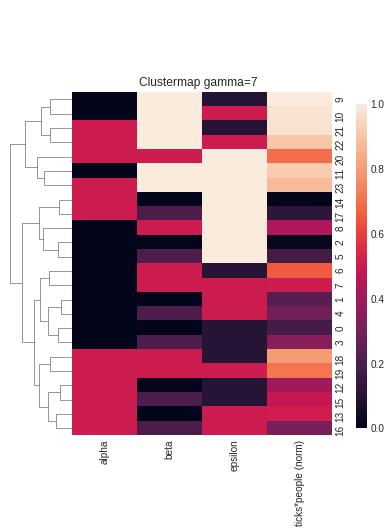

In [80]:
# Summed queuing load for gamma=7
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in d[1]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o8[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.iloc[ d[1] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30
filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

import seaborn as sns
fig = sns.clustermap(filtered_input_vars.loc[:,'alpha':],cbar_pos=(1.0, .2, .03, .6),figsize = (5,7.5),col_cluster=False)
# fig.axes.set_xticks(["epsilon","alpha","beta","lsla"])
fig.fig.suptitle('Clustermap gamma=7',y=0.85,x=0.56) 
fig.savefig("/home/daan/Desktop/clustermap_queuegamma7.png")

In [ ]:
# Summed queuing load for gamma=21
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in d[2]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o8[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.iloc[ d[2] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30
filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

import seaborn as sns
fig = sns.clustermap(filtered_input_vars.loc[:,'alpha':],cbar_pos=(1.0, .2, .03, .4))
fig.savefig("/home/daan/Desktop/clustermap_queuegamma21.png")

In [ ]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
y = {}
for j in d:
    y[j] = list()
    for i in range(12):
        y[j].append(data[data.o0==d[j][5]].iloc[:,i+3])

width_ratios = [1000,2000,1000]
f, ax  = plt.subplots(1, 3, sharey=True,figsize=(20,5),gridspec_kw={'width_ratios': width_ratios})

for i in y:
    ax[i].stackplot(x,y[i], labels=range(0,12))
    ax[i].set_xlabel("tick [10 min]")
    ax[i].set_ylabel("# people in queue [-]")
    ax[i].set_title(labels[i])
    ax[i].set_xlim([0,width_ratios[i]])


f.suptitle('Number of people queuing; Stackplot per facility; samples %s, %s, %s; zoomed'%(d[0][5],d[1][5],d[2][5]));

plt.show()

In [ ]:


# Creates two subplots and unpacks the output array immediately
f, ax = plt.subplots(1, 3, sharey=True,figsize = (15,5))
zoom_to_day = 10
facility_number = 0


y = {}


for k in d:
    y[k] = [list(),list()]

    for j in d[k]:


        for i in range(0,30):
            indexmin = i*144 + 4320*j
            indexmax = (i+1)*144 +4320*j
            maxval = data.iloc[indexmin:indexmax,facility_number+3].max()
            y[k][0].append(i)
            y[k][1].append(maxval)

for i in range(len(ax)):
    
    plotdata = pd.DataFrame(np.transpose(y[i]),columns=["days","vals"])
    sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day] ,ax=ax[i],color=colorscheme[i])
    ax[i].set_ylabel("# people in queue [-]")


f.suptitle('Number of people queuing; Max per day; all samples; facility #%s'%facility_number);


In [ ]:


# Creates two subplots and unpacks the output array immediately
f, ax = plt.subplots(1, 3, sharey=True,figsize = (15,5))
zoom_to_day = 10
facility_number = 5


y = {}


for k in d:
    y[k] = [list(),list()]

    for j in d[k]:


        for i in range(0,30):
            indexmin = i*144 + 4320*j
            indexmax = (i+1)*144 +4320*j
            maxval = data.iloc[indexmin:indexmax,facility_number+3].max()
            y[k][0].append(i)
            y[k][1].append(maxval)

for i in range(len(ax)):
    
    plotdata = pd.DataFrame(np.transpose(y[i]),columns=["days","vals"])
    sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day] ,ax=ax[i],color=colorscheme[i])
    ax[i].set_ylabel("# people in queue [-]")


f.suptitle('Number of people queuing; Max per day; all samples; facility #%s'%facility_number);